In [155]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [160]:
import warnings
warnings.filterwarnings('ignore')


In [161]:
test_url = "https://github.com/prathikbafna/kaggle-pb/blob/8f14f9a77da1b6e39b210dba9ab16275a4997938/spaceship-titanic/test.csv?raw=true"
train_url = "https://github.com/prathikbafna/kaggle-pb/blob/8f14f9a77da1b6e39b210dba9ab16275a4997938/spaceship-titanic/train.csv?raw=true"

train_data = pd.read_csv(train_url)
test_data = pd.read_csv(test_url)

In [163]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [164]:
def add_null_weight(col_name,df):
  new_col_name = col_name + '_' + 'weight'
  df[new_col_name] = 1
  count = 0
  for i in df[col_name]:
    if(i != i):
      df[new_col_name][count] = 0
    count+=1

In [165]:
for i in train_data:
  if train_data[i].isna().sum() > 0:
    add_null_weight(i,train_data)
    add_null_weight(i,test_data)


In [166]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_weight,CryoSleep_weight,Cabin_weight,Destination_weight,Age_weight,VIP_weight,RoomService_weight,FoodCourt_weight,ShoppingMall_weight,Spa_weight,VRDeck_weight,Name_weight
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,1,1,1,1,1,1,1,1,1,1,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,1,1,1,1,1,1,1,1,1,1,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1,1,1,1,1,1,1,1,1,1,1,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1,1,1,1,1,1,1,1,1,1,1,1
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,1,1,1,1,1,1,1,1,1,1,1


In [167]:
#Impute Data
train_data['Cabin'] = train_data['Cabin'].fillna('-1/-1/-1')
test_data['Cabin'] = test_data['Cabin'].fillna('-1/-1/-1')

train_data['HomePlanet'] = train_data['HomePlanet'].fillna(train_data['HomePlanet'].mode()[0])
test_data['HomePlanet'] = test_data['HomePlanet'].fillna(test_data['HomePlanet'].mode()[0])

train_data['Destination'] = train_data['Destination'].fillna(train_data['Destination'].mode()[0])
test_data['Destination'] = test_data['Destination'].fillna(test_data['Destination'].mode()[0])

train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())

train_data['RoomService'] = train_data['RoomService'].fillna(train_data['RoomService'].mean())
test_data['RoomService'] = test_data['RoomService'].fillna(test_data['RoomService'].mean())


train_data['FoodCourt'] = train_data['FoodCourt'].fillna(train_data['FoodCourt'].mean())
test_data['FoodCourt'] = test_data['FoodCourt'].fillna(test_data['FoodCourt'].mean())

train_data['ShoppingMall'] = train_data['ShoppingMall'].fillna(train_data['ShoppingMall'].mean())
test_data['ShoppingMall'] = test_data['ShoppingMall'].fillna(test_data['ShoppingMall'].mean())


train_data['Spa'] = train_data['Spa'].fillna(train_data['Spa'].mean())
test_data['Spa'] = test_data['Spa'].fillna(test_data['Spa'].mean())

train_data['VRDeck'] = train_data['VRDeck'].fillna(train_data['VRDeck'].mean())
test_data['VRDeck'] = test_data['VRDeck'].fillna(test_data['VRDeck'].mean())

train_data['VRDeck'] = train_data['VRDeck'].fillna(train_data['VRDeck'].mean())
test_data['VRDeck'] = test_data['VRDeck'].fillna(test_data['VRDeck'].mean())

train_data['VRDeck'] = train_data['VRDeck'].fillna(train_data['VRDeck'].mean())
test_data['VRDeck'] = test_data['VRDeck'].fillna(test_data['VRDeck'].mean())


train_data['VIP'] = train_data['VIP'].fillna(True)
test_data['VIP'] = test_data['VIP'].fillna(True)


train_data['CryoSleep'] = train_data['CryoSleep'].fillna(True)
test_data['CryoSleep'] = test_data['CryoSleep'].fillna(True)



In [168]:
train_data.isna().sum()

PassengerId              0
HomePlanet               0
CryoSleep                0
Cabin                    0
Destination              0
Age                      0
VIP                      0
RoomService              0
FoodCourt                0
ShoppingMall             0
Spa                      0
VRDeck                   0
Name                   200
Transported              0
HomePlanet_weight        0
CryoSleep_weight         0
Cabin_weight             0
Destination_weight       0
Age_weight               0
VIP_weight               0
RoomService_weight       0
FoodCourt_weight         0
ShoppingMall_weight      0
Spa_weight               0
VRDeck_weight            0
Name_weight              0
dtype: int64

In [10]:
# encoded_train_data = pd.get_dummies(train_data, columns = ['Destination', 'HomePlanet'])
# encoded_test_data = pd.get_dummies(test_data, columns = ['Destination', 'HomePlanet'])

In [ ]:
# encoded_train_data.head()

In [169]:
train_data[['deck','num','side']] = train_data['Cabin'].str.split('/',expand=True)
test_data[['deck','num','side']] = test_data['Cabin'].str.split('/',expand=True)

#df['your_column'] = df['your_column'].replace(-1, mode_value)


train_data['deck'] = train_data['deck'].replace('-1',train_data['deck'].mode()[0])
test_data['deck'] = test_data['deck'].replace('-1',test_data['deck'].mode()[0])


train_data['num'] = train_data['num'].replace('-1',train_data['num'].mode()[0])
test_data['num'] = test_data['num'].replace('-1',test_data['num'].mode()[0])


train_data['side'] = train_data['side'].replace('-1',train_data['side'].mode()[0])
test_data['side'] = test_data['side'].replace('-1',test_data['side'].mode()[0])

In [170]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_weight,CryoSleep_weight,Cabin_weight,Destination_weight,Age_weight,VIP_weight,RoomService_weight,FoodCourt_weight,ShoppingMall_weight,Spa_weight,VRDeck_weight,Name_weight,deck,num,side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,1,1,1,1,1,1,1,1,1,1,1,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,1,1,1,1,1,1,1,1,1,1,1,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1,1,1,1,1,1,1,1,1,1,1,1,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1,1,1,1,1,1,1,1,1,1,1,1,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,1,1,1,1,1,1,1,1,1,1,1,F,1,S


In [171]:
test_data['deck'].value_counts()

F    1545
G    1222
E     447
B     362
C     355
D     242
A      98
T       6
Name: deck, dtype: int64

In [172]:
test_data['side'].value_counts()

S    2193
P    2084
Name: side, dtype: int64

In [173]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_weight,CryoSleep_weight,Cabin_weight,Destination_weight,Age_weight,VIP_weight,RoomService_weight,FoodCourt_weight,ShoppingMall_weight,Spa_weight,VRDeck_weight,Name_weight,deck,num,side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,1,1,1,1,1,1,1,1,1,1,1,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,1,1,1,1,1,1,1,1,1,1,1,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1,1,1,1,1,1,1,1,1,1,1,1,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1,1,1,1,1,1,1,1,1,1,1,1,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,1,1,1,1,1,1,1,1,1,1,1,F,1,S


In [174]:
#not to consider Cabin Name

encoded_train_data = pd.get_dummies(train_data, columns = ['Destination', 'HomePlanet','deck','side'])
encoded_test_data = pd.get_dummies(test_data, columns = ['Destination', 'HomePlanet','deck','side'])


In [176]:
encoded_train_data.isna().sum()

PassengerId                    0
CryoSleep                      0
Cabin                          0
Age                            0
VIP                            0
RoomService                    0
FoodCourt                      0
ShoppingMall                   0
Spa                            0
VRDeck                         0
Name                         200
Transported                    0
HomePlanet_weight              0
CryoSleep_weight               0
Cabin_weight                   0
Destination_weight             0
Age_weight                     0
VIP_weight                     0
RoomService_weight             0
FoodCourt_weight               0
ShoppingMall_weight            0
Spa_weight                     0
VRDeck_weight                  0
Name_weight                    0
num                            0
Destination_55 Cancri e        0
Destination_PSO J318.5-22      0
Destination_TRAPPIST-1e        0
HomePlanet_Earth               0
HomePlanet_Europa              0
HomePlanet

In [177]:
features = [ 'CryoSleep', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'HomePlanet_weight', 'CryoSleep_weight', 'Cabin_weight',
       'Destination_weight', 'Age_weight', 'VIP_weight', 'RoomService_weight',
       'FoodCourt_weight', 'ShoppingMall_weight', 'Spa_weight',
       'VRDeck_weight','num', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'deck_A',
       'deck_B', 'deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_G', 'deck_T',
       'side_P', 'side_S']

target = ['Transported']

In [178]:
train_features = encoded_train_data[features]
test_features = encoded_test_data[features]

train_target = encoded_train_data[target]


In [179]:
train_features['num'] = train_features['num'].astype(int)
train_features.VIP = train_features.VIP.replace({True: 1, False: 0})
train_features.CryoSleep = train_features.CryoSleep.replace({True: 1, False: 0})


test_features['num'] = test_features['num'].astype(int)
test_features.VIP = test_features.VIP.replace({True: 1, False: 0})
test_features.CryoSleep = test_features.CryoSleep.replace({True: 1, False: 0})

In [180]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   int64  
 1   Age                        8693 non-null   float64
 2   VIP                        8693 non-null   int64  
 3   RoomService                8693 non-null   float64
 4   FoodCourt                  8693 non-null   float64
 5   ShoppingMall               8693 non-null   float64
 6   Spa                        8693 non-null   float64
 7   VRDeck                     8693 non-null   float64
 8   HomePlanet_weight          8693 non-null   int64  
 9   CryoSleep_weight           8693 non-null   int64  
 10  Cabin_weight               8693 non-null   int64  
 11  Destination_weight         8693 non-null   int64  
 12  Age_weight                 8693 non-null   int64  
 13  VIP_weight                 8693 non-null   int64

In [181]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb


X_train, X_test, y_train, y_test = train_test_split(train_features, train_target, test_size=0.15, random_state=42)




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [21:45:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "enable_category" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.7875766871165644


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

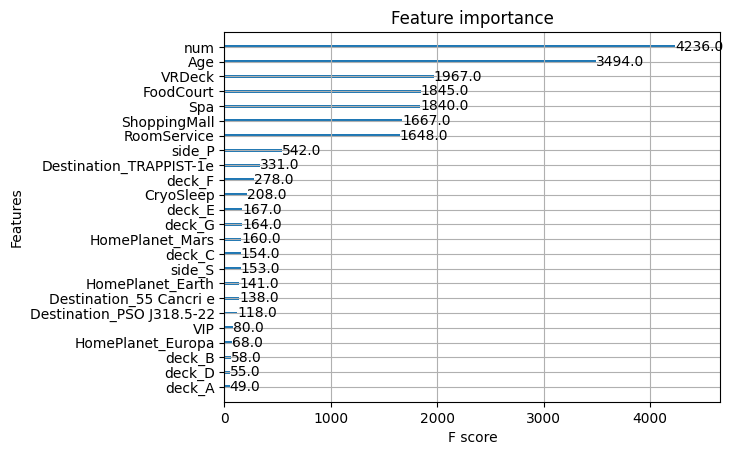

In [117]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
actual_test = xgb.DMatrix(test_features)
# Set hyperparameters
params = {
    'objective': 'binary:logistic',  # Binary classification problem
    'max_depth': 9,
    'learning_rate': 0.1,
    'eval_metric': 'logloss',
    'enable_category' : True
}


num_rounds = 300
model = xgb.train(params, dtrain, num_rounds)

# Make predictions on the test set
y_pred = model.predict(dtest)

# Convert probability predictions to binary predictions
y_pred_binary = np.round(y_pred)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy}")

# Feature importance plot
xgb.plot_importance(model)


In [118]:
test_pred = model.predict(actual_test)
test_pred_binary = np.round(test_pred)
print(test_pred_binary)
# Transported
test_data['PassengerId']

a = []
for i in test_pred_binary:
  if(i == 0):
    a.append(False)
  else:
    a.append(True)

result_dict = {'PassengerId' : test_data['PassengerId'] , 'Transported' : a}

result = pd.DataFrame(result_dict)
print(result.shape)

[0. 0. 1. ... 1. 1. 0.]
(4277, 2)


In [119]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [120]:
model = xgb.XGBClassifier(objective="multi:softmax", num_class=2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# You can also print other metrics such as confusion matrix, classification report, etc.
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7906441717791411

Confusion Matrix:
[[531 126]
 [147 500]]

Classification Report:
              precision    recall  f1-score   support

       False       0.78      0.81      0.80       657
        True       0.80      0.77      0.79       647

    accuracy                           0.79      1304
   macro avg       0.79      0.79      0.79      1304
weighted avg       0.79      0.79      0.79      1304



In [121]:
xgb_test = model.predict(test_features)
print(xgb_test)
result['xgb'] = [x==1 for x in xgb_test]
result.head()

[1 0 1 ... 1 1 1]


,PassengerId,Transported,xgb
0,0013_01,False,True
1,0018_01,False,False
2,0019_01,True,True
3,0021_01,True,True
4,0023_01,True,True


In [122]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler


In [ ]:
# features.fillna(-1,inplace = True)
# features.dropna(inplace = True)

In [109]:
train_normal = scale(train_features)
test_normal = scale(test_features)

In [140]:
train_features.shape

(8693, 36)

In [141]:
test_features.shape

(4277, 36)

In [142]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(train_normal)
print(X_reduced.shape)

(8693, 28)


In [110]:
model = xgb.XGBClassifier(objective="multi:softmax", num_class=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(train_normal, train_target, test_size=0.1, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# You can also print other metrics such as confusion matrix, classification report, etc.
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7885057471264367

Confusion Matrix:
[[357  86]
 [ 98 329]]

Classification Report:
              precision    recall  f1-score   support

       False       0.78      0.81      0.80       443
        True       0.79      0.77      0.78       427

    accuracy                           0.79       870
   macro avg       0.79      0.79      0.79       870
weighted avg       0.79      0.79      0.79       870



In [111]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set hyperparameters
params = {
    'objective': 'binary:logistic',  # Binary classification problem
    'max_depth': 7,
    'learning_rate': 0.1,
    'eval_metric': 'logloss'
}


num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

# Make predictions on the test set
y_pred = model.predict(dtest)

# Convert probability predictions to binary predictions
y_pred_binary = np.round(y_pred)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7770114942528735


In [54]:
xgb_log_loss_test = model.predict(actual_test)
xgb_log_loss_test_pred_binary = np.round(xgb_log_loss_test)
print(xgb_log_loss_test)
result['xgb_log_loss'] = [x==1 for x in xgb_log_loss_test_pred_binary]
result.head()

[0.54586226 0.01467087 0.99507374 ... 0.9721787  0.78895533 0.62243986]


,PassengerId,Transported,xgb,xgb_log_loss
0,0013_01,False,False,True
1,0018_01,False,False,False
2,0019_01,True,True,True
3,0021_01,True,True,True
4,0023_01,True,True,True


In [56]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# You can also print other metrics such as confusion matrix, classification report, etc.
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7717078780908568

Confusion Matrix:
[[626 235]
 [162 716]]

Classification Report:
              precision    recall  f1-score   support

       False       0.79      0.73      0.76       861
        True       0.75      0.82      0.78       878

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
for i in result:
  print(i)

PassengerId
Transported
xgb
xgb_log_loss


In [58]:
print(result['Transported'][0])

False


In [60]:

for i in range(0,len(result)):
  res = 0
  if(result['Transported'][i] == True):
    res+=1
  if(result['xgb'][i] == True):
    res+=1
  if(result['xgb_log_loss'][i] == True):
    res+=1
  if(res<2):
    result['Transported'][i] = False
  else:
    result['Transported'][i] = True

<ipython-input-60-864bed20141a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Transported'][i] = False
<ipython-input-60-864bed20141a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Transported'][i] = True


In [62]:
final_result = result[['PassengerId','Transported']]
final_result.to_csv('submission.csv',index=False)

In [96]:
final_result['Transported'] = [x==1 for x in xgb_test]
final_result = result[['PassengerId','Transported']]
final_result.to_csv('submission_2.csv',index=False)

In [95]:
result.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


#features without weight but imputed

In [112]:
features = [ 'CryoSleep', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','num', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'deck_A',
       'deck_B', 'deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_G', 'deck_T',
       'side_P', 'side_S']

target = ['Transported']

Lets perform EDA to find relationship between the variables and target

In [124]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,deck,num,side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [141]:
import matplotlib.pyplot as plt

homePlanet_case = train_data[['PassengerId','HomePlanet','Transported']]

In [150]:
homePlanet_case['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [148]:
homePlanet_case[homePlanet_case['HomePlanet'] == 'Europa']['Transported'].value_counts()

True     1404
False     727
Name: Transported, dtype: int64

In [149]:
homePlanet_case[homePlanet_case['HomePlanet'] == 'Earth']['Transported'].value_counts()

False    2651
True     1951
Name: Transported, dtype: int64

In [151]:
homePlanet_case[homePlanet_case['HomePlanet'] == 'Mars']['Transported'].value_counts()

True     920
False    839
Name: Transported, dtype: int64

In [153]:
print(train_data[train_data['CryoSleep'] == True]['Transported'].value_counts())
print(train_data[train_data['CryoSleep'] == False]['Transported'].value_counts())

True     2483
False     554
Name: Transported, dtype: int64
False    3650
True     1789
Name: Transported, dtype: int64


In [182]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
# X_train, X_test, y_train, y_test
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [184]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

       False       0.74      0.69      0.72       657
        True       0.71      0.75      0.73       647

    accuracy                           0.72      1304
   macro avg       0.72      0.72      0.72      1304
weighted avg       0.72      0.72      0.72      1304

[[455 202]
 [160 487]]
